# Importing Libraries

In [56]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


# Data Encoding

In [4]:
# Ecoded 0 for Femal and 1 for Male
df["Gender"] = df["Gender"].apply(lambda x: 0 if x == "Female" else 1)
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
60106,60107,Customer_60107,45,1,Los Angeles,14,69.50,145,0
59599,59600,Customer_59600,59,1,Chicago,1,83.80,455,1
4277,4278,Customer_4278,24,0,New York,12,43.36,499,0
3811,3812,Customer_3812,30,0,New York,21,54.65,294,1
28655,28656,Customer_28656,41,1,Los Angeles,5,84.61,404,0


In [5]:
# Encoding categorial variable ie.location 
df["Location"] = OE.fit_transform(df[["Location"]])
Loc = OE.categories_
Loc

[array(['Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York'],
       dtype=object)]

In [6]:
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
90732,90733,Customer_90733,51,0,4.0,4,83.47,495,0
46166,46167,Customer_46167,23,1,4.0,11,49.10,435,1
80915,80916,Customer_80916,68,1,0.0,15,93.31,179,1
37105,37106,Customer_37106,26,1,4.0,8,44.22,436,0
76629,76630,Customer_76630,33,0,4.0,11,41.27,74,1


# Data Segregation

In [9]:
Y = df.iloc[:,-1]
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [7]:
X = df.iloc[:,2:-1]
X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,1,2.0,17,73.36,236
1,62,0,4.0,1,48.76,172
2,24,0,2.0,5,85.47,460
3,36,0,3.0,3,97.94,297
4,46,0,3.0,19,58.14,266


# Data Scaling

In [8]:
# Scalling to make the inputs in a specific range and also for making computations faster
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)
X

array([[ 1.24167039,  1.00432937,  0.00294695,  0.65111499,  0.41060598,
        -0.29428898],
       [ 1.17622625, -0.99568929,  1.41974758, -1.65887854, -0.80537409,
        -0.78485174],
       [-1.31065114, -0.99568929,  0.00294695, -1.08138015,  1.0092043 ,
         1.42268068],
       ...,
       [ 1.30711454,  1.00432937, -1.41385369,  0.65111499,  1.5351404 ,
        -0.17931334],
       [ 0.45634069, -0.99568929,  1.41974758,  1.08423877, -0.78115335,
         1.22338955],
       [-1.11431871, -0.99568929,  0.00294695,  0.93986418,  0.56927655,
        -0.7771867 ]])

# Data Splitting

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

# Model Definition

In [11]:
Master_Evaluations = []

def Evaluations_store(Y_test, Y_pred):
    f1 = f1_score(Y_test, Y_pred)
    acc = accuracy_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    pre = precision_score(Y_test, Y_pred)
    
    return  f1, acc, rec, pre

def CalModel(model, Model_Name = None):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    f1, acc, rec, pre = Evaluations_store(Y_test, Y_pred)
    Master_Evaluations.append([Model_Name, f1, acc, rec, pre])
    print(classification_report(Y_test,Y_pred))
    
    
    

# Logistic Regression

In [12]:
LOG_REG = LogisticRegression()
CalModel(LOG_REG, "Log_reg")

              precision    recall  f1-score   support

           0       0.50      0.61      0.55     15110
           1       0.50      0.39      0.44     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



In [13]:
# Hyper Tuning
params = [ ['lbfgs','l2'],['lbfgs','none'],
           ['liblinear','l1'],['liblinear','l2'],
           ['newton-cg','l2'],['newton-cg','none'],
           ['sag','l2'],['sag','none'],
           ['saga','l1'],['saga','l2'],['saga','none']  ]

#  ['saga','elasticnet']  --->  Need to perform Scalling on the Data 

all_combinations = []

for i in params:

    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression(solver=i[0] , penalty=i[1])

    model.fit(X_train,Y_train)

    Y_pred = model.predict(X_test)
     
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(Y_test,Y_pred)
    
    print(f"{i} ---> {acc} ")
    
    all_combinations.append(acc)

['lbfgs', 'l2'] ---> 0.5005666666666667 
['lbfgs', 'none'] ---> 0.5005666666666667 
['liblinear', 'l1'] ---> 0.5003666666666666 
['liblinear', 'l2'] ---> 0.5005666666666667 
['newton-cg', 'l2'] ---> 0.5005666666666667 
['newton-cg', 'none'] ---> 0.5005666666666667 
['sag', 'l2'] ---> 0.5005666666666667 
['sag', 'none'] ---> 0.5006333333333334 
['saga', 'l1'] ---> 0.5001666666666666 
['saga', 'l2'] ---> 0.5005666666666667 
['saga', 'none'] ---> 0.5005666666666667 


In [14]:
# Best Hyperparmeter for Logistic Regression
print(f"{params[all_combinations.index(max(all_combinations))]} ---> {max(all_combinations)}")


Master_Evaluations.append([f"Log_reg_{params[all_combinations.index(max(all_combinations))]}", None, max(all_combinations), None, None])


['sag', 'none'] ---> 0.5006333333333334


# SVM

In [57]:
SVC_linear = SVC()
CalModel(SVC_linear,"SVC_linear")

              precision    recall  f1-score   support

           0       0.50      0.60      0.55     15110
           1       0.50      0.40      0.44     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [58]:
SVC_sigmoid = SVC(kernel="sigmoid")
CalModel(SVC_sigmoid,"SVC_sigmoid")

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15110
           1       0.49      0.49      0.49     14890

    accuracy                           0.49     30000
   macro avg       0.49      0.49      0.49     30000
weighted avg       0.49      0.49      0.49     30000



# KNN

In [15]:
KNN = KNeighborsClassifier()
CalModel(KNN,"KNN")

              precision    recall  f1-score   support

           0       0.51      0.52      0.51     15110
           1       0.50      0.50      0.50     14890

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.51     30000
weighted avg       0.51      0.51      0.51     30000



In [16]:
# Hypertuning
KNN_LIST = []
for i in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    Y_pred = KNN.predict(X_test)
    print(f"{i} ----> {accuracy_score(Y_test,Y_pred)}")
    KNN_LIST.append(accuracy_score(Y_test,Y_pred))

1 ----> 0.5005
2 ----> 0.5003666666666666
3 ----> 0.5042666666666666
4 ----> 0.5048
5 ----> 0.5057
6 ----> 0.5053333333333333
7 ----> 0.5010666666666667
8 ----> 0.5022666666666666
9 ----> 0.5003666666666666
10 ----> 0.505
11 ----> 0.5038
12 ----> 0.5029333333333333
13 ----> 0.5022333333333333
14 ----> 0.5036333333333334
15 ----> 0.5051666666666667
16 ----> 0.5018333333333334
17 ----> 0.5045666666666667
18 ----> 0.5055666666666667
19 ----> 0.5074666666666666
20 ----> 0.5064666666666666
21 ----> 0.5080333333333333
22 ----> 0.5034666666666666
23 ----> 0.5051666666666667
24 ----> 0.5032666666666666
25 ----> 0.5034333333333333
26 ----> 0.5035666666666667
27 ----> 0.5048666666666667
28 ----> 0.5019
29 ----> 0.5020333333333333
30 ----> 0.5009666666666667
31 ----> 0.5009666666666667
32 ----> 0.5023666666666666
33 ----> 0.501
34 ----> 0.5024
35 ----> 0.5023666666666666
36 ----> 0.5019666666666667
37 ----> 0.5020333333333333
38 ----> 0.5029
39 ----> 0.5019
40 ----> 0.5013
41 ----> 0.499433333333

In [17]:
# Best Hyperparmeter for KNN
print(f"{KNN_LIST.index(max(KNN_LIST))+1} ---> {max(KNN_LIST)}")

Master_Evaluations.append([f"KNN_{KNN_LIST.index(max(KNN_LIST))+1}", None, max(KNN_LIST), None, None])


21 ---> 0.5080333333333333


# Decision Tree

In [18]:
DTC_GINI = DecisionTreeClassifier()
CalModel(DTC_GINI, "DTC_GINI")

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15110
           1       0.50      0.50      0.50     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [19]:
# HyperTuning
DTC_ENTROPY = DecisionTreeClassifier(criterion="entropy")
CalModel(DTC_ENTROPY, "DTC_ENTROPY")

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15110
           1       0.49      0.49      0.49     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



### MAX_DEPT

In [20]:
MAX_DEPT_LIST = []
for i in range(1,50):
    DTC_1 = DecisionTreeClassifier(max_depth=i,)
    DTC_1.fit(X_train,Y_train)
    Y_pred = DTC_1.predict(X_test)
    print(f"{i} ---> {accuracy_score(Y_test,Y_pred)}")
    MAX_DEPT_LIST.append(accuracy_score(Y_test,Y_pred))

1 ---> 0.5040666666666667
2 ---> 0.4959
3 ---> 0.4959
4 ---> 0.4961333333333333
5 ---> 0.49643333333333334
6 ---> 0.4978666666666667
7 ---> 0.49893333333333334
8 ---> 0.5018666666666667
9 ---> 0.5002666666666666
10 ---> 0.5009666666666667
11 ---> 0.49793333333333334
12 ---> 0.49943333333333334
13 ---> 0.4973
14 ---> 0.4985
15 ---> 0.4991
16 ---> 0.4997333333333333
17 ---> 0.5027666666666667
18 ---> 0.5013666666666666
19 ---> 0.5038
20 ---> 0.5031333333333333
21 ---> 0.5014
22 ---> 0.49773333333333336
23 ---> 0.49793333333333334
24 ---> 0.4982
25 ---> 0.49646666666666667
26 ---> 0.5002
27 ---> 0.4997666666666667
28 ---> 0.5017333333333334
29 ---> 0.5023
30 ---> 0.5028
31 ---> 0.5009
32 ---> 0.5014333333333333
33 ---> 0.5016333333333334
34 ---> 0.5044
35 ---> 0.5018
36 ---> 0.5007333333333334
37 ---> 0.5012
38 ---> 0.5012333333333333
39 ---> 0.5047333333333334
40 ---> 0.5027
41 ---> 0.5018
42 ---> 0.5001666666666666
43 ---> 0.5022
44 ---> 0.5033
45 ---> 0.5022666666666666
46 ---> 0.50416

In [21]:
print(f"{MAX_DEPT_LIST.index(max(MAX_DEPT_LIST))+1} ---> {max(MAX_DEPT_LIST)}")

39 ---> 0.5047333333333334


In [22]:
DTC_MAX_DEPT_LIST = DecisionTreeClassifier(max_depth=5)
CalModel(DTC_MAX_DEPT_LIST,'DTC_MAX_DEPT_LIST')

              precision    recall  f1-score   support

           0       0.50      0.31      0.38     15110
           1       0.49      0.69      0.57     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.48     30000
weighted avg       0.50      0.50      0.48     30000



### MIN_SAMPLE_SPLIT

In [23]:
MIN_SAMPLE_SPLIT = []
for i in range(2,50):
    DTC_2 = DecisionTreeClassifier(min_samples_split=i)
    DTC_2.fit(X_train,Y_train)
    Y_pred = DTC_2.predict(X_test)
    
    print(f"{i} ---> {accuracy_score(Y_test,Y_pred)}")
    
    MIN_SAMPLE_SPLIT.append(accuracy_score(Y_test,Y_pred))

2 ---> 0.5024
3 ---> 0.5011333333333333
4 ---> 0.5024666666666666
5 ---> 0.5031
6 ---> 0.5025333333333334
7 ---> 0.5036666666666667
8 ---> 0.5033333333333333
9 ---> 0.5024
10 ---> 0.5023333333333333
11 ---> 0.5016666666666667
12 ---> 0.5021666666666667
13 ---> 0.5014666666666666
14 ---> 0.5014
15 ---> 0.5023
16 ---> 0.5025
17 ---> 0.5016333333333334
18 ---> 0.5014666666666666
19 ---> 0.5017666666666667
20 ---> 0.5035
21 ---> 0.5032666666666666
22 ---> 0.5045
23 ---> 0.5043666666666666
24 ---> 0.5052333333333333
25 ---> 0.5048
26 ---> 0.5044333333333333
27 ---> 0.5040333333333333
28 ---> 0.5038333333333334
29 ---> 0.5023333333333333
30 ---> 0.5023666666666666
31 ---> 0.5020666666666667
32 ---> 0.5024
33 ---> 0.5018
34 ---> 0.5012666666666666
35 ---> 0.5011666666666666
36 ---> 0.5011
37 ---> 0.5016333333333334
38 ---> 0.5004666666666666
39 ---> 0.5006
40 ---> 0.5013333333333333
41 ---> 0.5008
42 ---> 0.5018
43 ---> 0.5022
44 ---> 0.5019333333333333
45 ---> 0.5015
46 ---> 0.501
47 ---> 0.

In [24]:
print(f"{MIN_SAMPLE_SPLIT.index(max(MIN_SAMPLE_SPLIT))+2} ---> {max(MIN_SAMPLE_SPLIT)}")

24 ---> 0.5052333333333333


In [25]:
DTC_MIN_SAMPLE_SPLIT = DecisionTreeClassifier(min_samples_split=25)
CalModel(DTC_MIN_SAMPLE_SPLIT)

              precision    recall  f1-score   support

           0       0.51      0.52      0.52     15110
           1       0.50      0.49      0.49     14890

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.51     30000
weighted avg       0.51      0.51      0.51     30000



### MIN_SAMPLE_LEAF

In [26]:
MIN_SAMPLE_LEAF = []
for i in range(1,50):
    DTC_3 = DecisionTreeClassifier(min_samples_leaf=i)
    DTC_3.fit(X_train,Y_train)
    Y_pred = DTC_3.predict(X_test)
    
    print(f"{i} ---> {accuracy_score(Y_test,Y_pred)}")
    
    MIN_SAMPLE_LEAF.append(accuracy_score(Y_test,Y_pred))

1 ---> 0.5007
2 ---> 0.5029
3 ---> 0.5036333333333334
4 ---> 0.5077
5 ---> 0.5050333333333333
6 ---> 0.5072333333333333
7 ---> 0.5053333333333333
8 ---> 0.5048333333333334
9 ---> 0.5066666666666667
10 ---> 0.5074666666666666
11 ---> 0.5072666666666666
12 ---> 0.5046333333333334
13 ---> 0.5054
14 ---> 0.5042666666666666
15 ---> 0.5024
16 ---> 0.5020333333333333
17 ---> 0.506
18 ---> 0.5054333333333333
19 ---> 0.5049333333333333
20 ---> 0.5073333333333333
21 ---> 0.5066333333333334
22 ---> 0.5047333333333334
23 ---> 0.5055333333333333
24 ---> 0.5072
25 ---> 0.5072
26 ---> 0.5105333333333333
27 ---> 0.5080666666666667
28 ---> 0.5073
29 ---> 0.5057666666666667
30 ---> 0.504
31 ---> 0.5026666666666667
32 ---> 0.5034
33 ---> 0.5037333333333334
34 ---> 0.5037
35 ---> 0.5056
36 ---> 0.5063666666666666
37 ---> 0.5048
38 ---> 0.505
39 ---> 0.5062333333333333
40 ---> 0.5058
41 ---> 0.5046666666666667
42 ---> 0.5052
43 ---> 0.5051666666666667
44 ---> 0.5039666666666667
45 ---> 0.5026
46 ---> 0.501

In [27]:
print(f"{MIN_SAMPLE_LEAF.index(max(MIN_SAMPLE_LEAF))+2} ---> {max(MIN_SAMPLE_LEAF)}")

27 ---> 0.5105333333333333


In [28]:
DTC_MIN_SAMPLE_LEAF = DecisionTreeClassifier(min_samples_split=25)
CalModel(DTC_MIN_SAMPLE_LEAF,'DTC_MIN_SAMPLE_LEAF')

              precision    recall  f1-score   support

           0       0.51      0.52      0.52     15110
           1       0.50      0.48      0.49     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



# Stratified K-FOLD on Decision Tree

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

SKFOLD_LIST = []

for i in range(2,20):
    skfolds = StratifiedKFold(n_splits=i)

    DTC_SKFOLD = DecisionTreeClassifier()

    scores = cross_val_score(DTC_SKFOLD,X,Y,cv=skfolds)
    
    SKFOLD_LIST.append(np.mean(scores))



In [30]:
print(f"{SKFOLD_LIST.index(max(SKFOLD_LIST))+2} ---> {max(SKFOLD_LIST)}")

Master_Evaluations.append([f"SKFOLD_DTC{SKFOLD_LIST.index(max(SKFOLD_LIST))+2}", None, max(SKFOLD_LIST), None, None])

8 ---> 0.5035000000000001


# RandomForest

In [31]:
RFC = RandomForestClassifier()
CalModel(RFC,'RFC')

              precision    recall  f1-score   support

           0       0.51      0.53      0.52     15110
           1       0.50      0.48      0.49     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



# Criterion → entropy

In [32]:
RFC_Entropy = RandomForestClassifier(criterion="entropy")
CalModel(RFC_Entropy,'RFC_Entropy')

              precision    recall  f1-score   support

           0       0.50      0.53      0.52     15110
           1       0.50      0.47      0.48     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



### E_Max_depth


In [33]:
E_MAX_DEPTH = []
for i in range(1,15):
    model = RandomForestClassifier(max_depth=i,criterion="entropy")
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    E_MAX_DEPTH.append(accuracy_score(Y_test,Y_pred))
    
E_MAX_DEPTH_DF = pd.DataFrame(data=E_MAX_DEPTH,index=np.arange(1,15),columns=['Accuracy_score'])

### E_Max_depth


In [34]:
E_MIN_SAMPLE_SPLIT = [np.NAN,np.NAN]
for i in range(2,15):
    model = RandomForestClassifier(min_samples_split=i,criterion="entropy")
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    E_MIN_SAMPLE_SPLIT.append(accuracy_score(Y_test,Y_pred))
    
E_MIN_SAMPLE_SPLIT_DF = pd.DataFrame(data=E_MIN_SAMPLE_SPLIT,index=np.arange(0,15),columns=['Accuracy_score'])

### E_Min_sample_leaf

In [35]:
E_MIN_SAMPLE_LEAF = [np.NAN,np.NAN]
for i in range(2,15):
    model = RandomForestClassifier(min_samples_leaf=i,criterion="entropy")
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    E_MIN_SAMPLE_LEAF.append(accuracy_score(Y_test,Y_pred))
    
E_MIN_SAMPLE_LEAF_DF = pd.DataFrame(data=E_MIN_SAMPLE_LEAF,index=np.arange(0,15),columns=['Accuracy_score'])

# Plotting Graph for all using ENTROPY

max_depth    Accuracy_score
1          0.5058
----------------------------
min_sample_leaf     Accuracy_score
11          0.5061
----------------------------
min_sample_split     Accuracy_score
10        0.505233


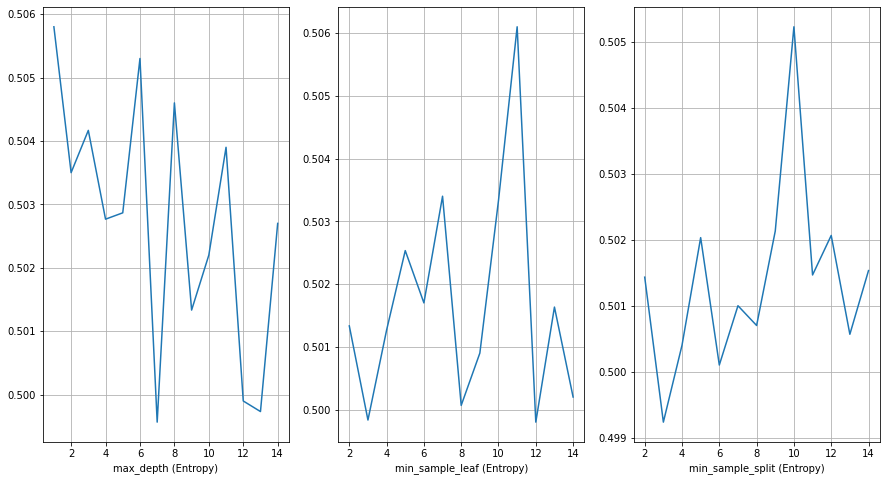

In [36]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.plot(E_MAX_DEPTH_DF)
plt.xlabel("max_depth (Entropy)")
plt.grid()
print("max_depth",E_MAX_DEPTH_DF[E_MAX_DEPTH_DF.Accuracy_score == E_MAX_DEPTH_DF.Accuracy_score.max()])
print("----------------------------")

plt.subplot(1,3,2)
plt.plot(E_MIN_SAMPLE_LEAF_DF)
plt.xlabel("min_sample_leaf (Entropy)")
plt.grid()
print("min_sample_leaf",E_MIN_SAMPLE_LEAF_DF[E_MIN_SAMPLE_LEAF_DF.Accuracy_score == E_MIN_SAMPLE_LEAF_DF.Accuracy_score.max()])
print("----------------------------")

plt.subplot(1,3,3)
plt.plot(E_MIN_SAMPLE_SPLIT)
plt.xlabel("min_sample_split (Entropy)")
plt.grid()
print("min_sample_split",E_MIN_SAMPLE_SPLIT_DF[E_MIN_SAMPLE_SPLIT_DF.Accuracy_score == E_MIN_SAMPLE_SPLIT_DF.Accuracy_score.max()])

# Criterion → GINI

### G_Max_depth


In [37]:
G_MAX_DEPTH = []
for i in range(1,15):
    model = RandomForestClassifier(max_depth=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    G_MAX_DEPTH.append(accuracy_score(Y_test,Y_pred))
    
G_MAX_DEPTH_DF = pd.DataFrame(data=G_MAX_DEPTH,index=np.arange(1,15),columns=['Accuracy_score'])

### G_Min_sample_leaf

In [38]:
G_MIN_SAMPLE_SPLIT = [np.NAN,np.NAN]
for i in range(2,15):
    model = RandomForestClassifier(min_samples_split=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    G_MIN_SAMPLE_SPLIT.append(accuracy_score(Y_test,Y_pred))
    
G_MIN_SAMPLE_SPLIT_DF = pd.DataFrame(data=G_MIN_SAMPLE_SPLIT,index=np.arange(0,15),columns=['Accuracy_score'])

### G_Min_sample_split

In [39]:
G_MIN_SAMPLE_LEAF = [np.NAN,np.NAN]
for i in range(2,15):
    model = RandomForestClassifier(min_samples_leaf=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    G_MIN_SAMPLE_LEAF.append(accuracy_score(Y_test,Y_pred))
    
G_MIN_SAMPLE_LEAF_DF = pd.DataFrame(data=G_MIN_SAMPLE_LEAF,index=np.arange(0,15),columns=['Accuracy_score'])

# Plotting Graph for all using GINI

max_depth    Accuracy_score
2           0.507
----------------------------
min_sample_leaf    Accuracy_score
4          0.5047
----------------------------
min_sample_split    Accuracy_score
5        0.503267


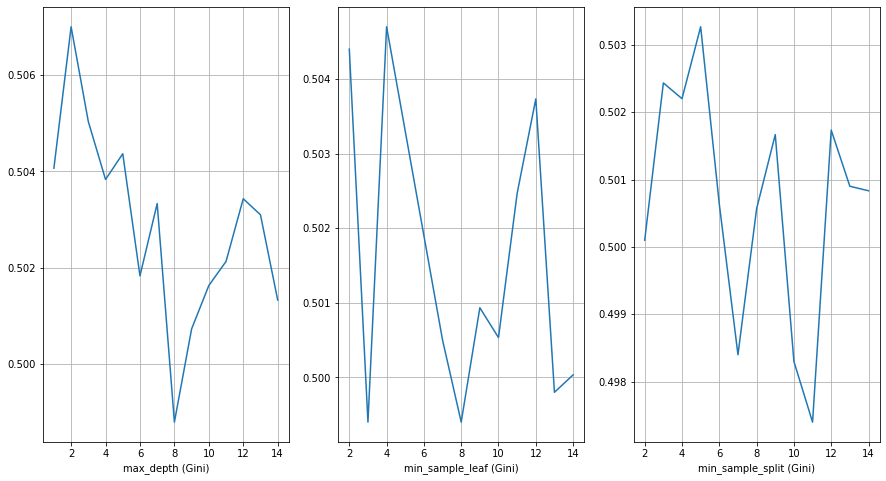

In [40]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.plot(G_MAX_DEPTH_DF)
plt.xlabel("max_depth (Gini)")
plt.grid()
print("max_depth",G_MAX_DEPTH_DF[G_MAX_DEPTH_DF.Accuracy_score == G_MAX_DEPTH_DF.Accuracy_score.max()])
print("----------------------------")

plt.subplot(1,3,2)
plt.plot(G_MIN_SAMPLE_LEAF_DF)
plt.xlabel("min_sample_leaf (Gini)")
plt.grid()
print("min_sample_leaf",G_MIN_SAMPLE_LEAF_DF[G_MIN_SAMPLE_LEAF_DF.Accuracy_score == G_MIN_SAMPLE_LEAF_DF.Accuracy_score.max()])
print("----------------------------")

plt.subplot(1,3,3)
plt.plot(G_MIN_SAMPLE_SPLIT)
plt.xlabel("min_sample_split (Gini)")
plt.grid()
print("min_sample_split",G_MIN_SAMPLE_SPLIT_DF[G_MIN_SAMPLE_SPLIT_DF.Accuracy_score == G_MIN_SAMPLE_SPLIT_DF.Accuracy_score.max()])

# Evaluations

In [70]:
# Creating a dataframe of all evaluations
Evalauations = pd.DataFrame(Master_Evaluations,columns= ["Model", "f1", 'acc', 'rec', 'pre'])

In [71]:
Evalauations

,Model,f1,acc,rec,pre
0,Log_reg,0.436242,0.500567,0.389322,0.496021
1,"Log_reg_['sag', 'none']",NaN,0.500633,NaN,NaN
2,KNN,0.499105,0.505700,0.496172,0.502073
3,KNN_21,NaN,0.508033,NaN,NaN
4,DTC_GINI,0.497248,0.500667,0.497515,0.496981
5,DTC_ENTROPY,0.493779,0.498200,0.493083,0.494477
6,DTC_MAX_DEPT_LIST,0.574583,0.496433,0.685158,0.494738
7,None,0.494172,0.505267,0.486904,0.501661
8,DTC_MIN_SAMPLE_LEAF,0.492282,0.504400,0.484083,0.500764
9,SKFOLD_8,NaN,0.503500,NaN,NaN


In [105]:
# Melting it to make it flexible to plot
Melted_Evalauations = pd.melt(Evalauations, id_vars = "Model")
Melted_Evalauations

,Model,variable,value
0,Log_reg,f1,0.436242
1,"Log_reg_['sag', 'none']",f1,NaN
2,KNN,f1,0.499105
3,KNN_21,f1,NaN
4,DTC_GINI,f1,0.497248
5,DTC_ENTROPY,f1,0.493779
6,DTC_MAX_DEPT_LIST,f1,0.574583
7,None,f1,0.494172
8,DTC_MIN_SAMPLE_LEAF,f1,0.492282
9,SKFOLD_8,f1,NaN


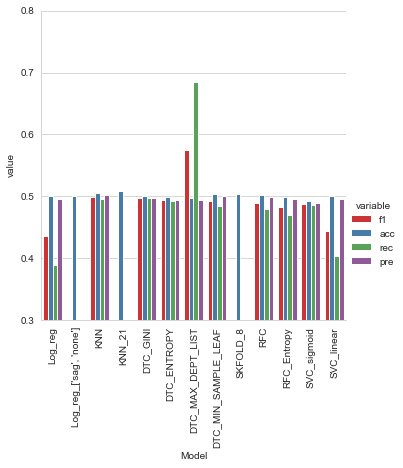

In [106]:
sns.set_style("whitegrid")
sns.set_palette("Set1") 

sns.catplot(x='Model', y='value', hue='variable', data=Melted_Evalauations, kind='bar', height=5)

plt.ylim(0.3,0.8)
plt.xticks(rotation='vertical')
plt.show()